#### 맷플롯립

- 시각화 도구 모듈, 다양한 차트 활용 가능
- 공식 웹사이트 : https://matplotlib.org/
- 맷플롯립 대체 모듈
    - Seaborn : https://seaborn.pydata.org/

##### 맷플롯립 설치

- matplotlib inline (기본으로 설치돼 있음)
```python
%matplotlib inline
```

- matplotlib 설치

```python
!pip install matplotlib

import matplotlib
```

In [1]:
!pip install matplotlib

In [2]:
# 추가 seaborn 설치
!pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00


#### matplotlib 사용

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
arr = np.random.randn(30).cumsum()
arr

array([ 0.35500216,  1.60026656,  2.16747553,  3.11053338,  3.21896343,
        3.95456236,  3.5962771 ,  3.37546212,  4.03514937,  3.29079496,
        1.66414403,  1.77138332,  1.13796285, -0.42814839, -1.68972177,
       -3.4768237 , -2.48328755, -2.33787194, -4.54404914, -5.31122947,
       -4.70670408, -4.15095214, -4.19783233, -2.66535429, -2.73444304,
       -3.74364733, -3.2369716 , -2.67391905, -2.44775219, -1.83486092])

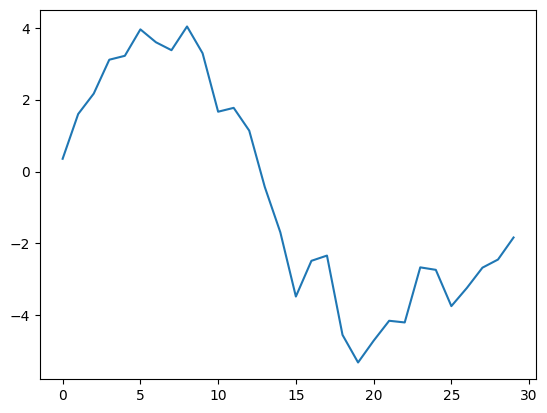

In [7]:
plt.plot(arr)

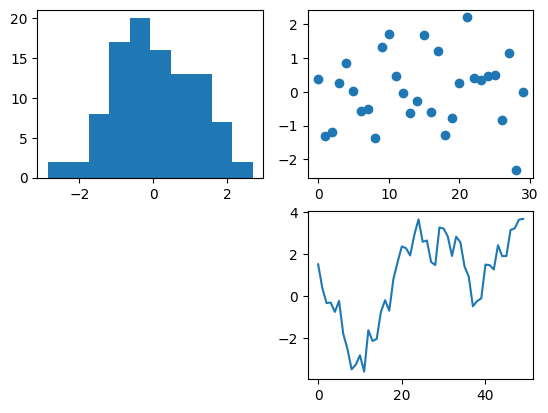

In [34]:
# 다중차트
fig = plt.figure() # figure 객체 생성
ax1 = fig.add_subplot(2, 2, 1) # 차트1(2행 2열 차트 중 1번 위치)
ax2 = fig.add_subplot(2, 2, 2) # 차트2(2행 2열 차트 중 2번 위치)
ax3 = fig.add_subplot(2, 2, 4) # 차트3(2행 2열 차트 중 4번 위치)

ax1.hist(np.random.randn(100)) # 분포표
ax2.scatter(np.arange(30), np.random.randn(30)) # 스캐터차트
ax3.plot(np.random.randn(50).cumsum()) # 라인차트

plt.show() # 차트 보기

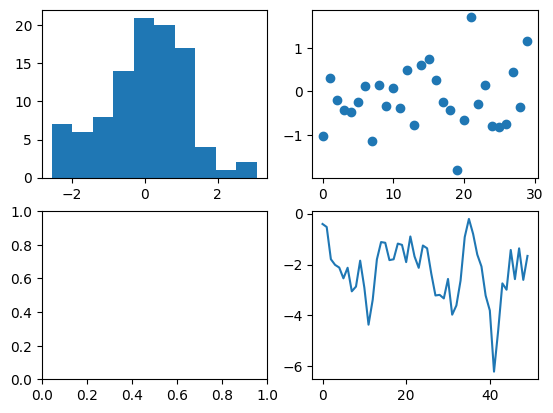

In [33]:
# 안 쓰는 차트도 같이 나옴
fig, axes = plt.subplots(2, 2)
axes[0][0].hist(np.random.randn(100))
axes[0][1].scatter(np.arange(30), np.random.randn(30))
axes[1][1].plot(np.random.randn(50).cumsum())
plt.show()

#### 차트 꾸미기

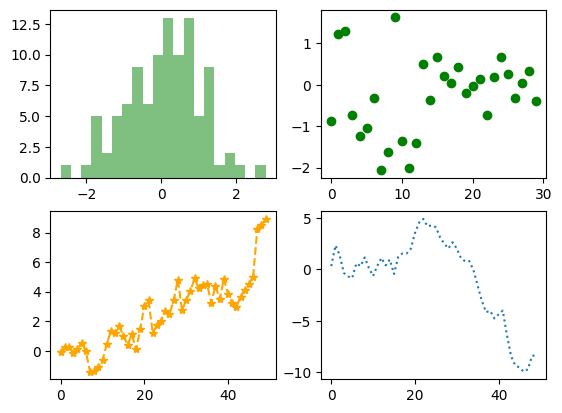

In [52]:
# 차트색상, 라인종류, 마커
fig, axes = plt.subplots(2, 2)
axes[0][0].hist(np.random.randn(100), bins=20, color='green', alpha=0.5) # bins => 범위 20개로 늘림 # alpha => 투명도
axes[0][1].scatter(np.arange(30), np.random.randn(30), color='green')
axes[1][0].plot(np.random.randn(50).cumsum(), linestyle='--', color='orange', marker='*') # marker => 값위치 표시(*, ^, o, 1)
axes[1][1].plot(np.random.randn(50).cumsum(), linestyle=':') # linestyle => 선 종류(-, --, :, -.)
plt.show()

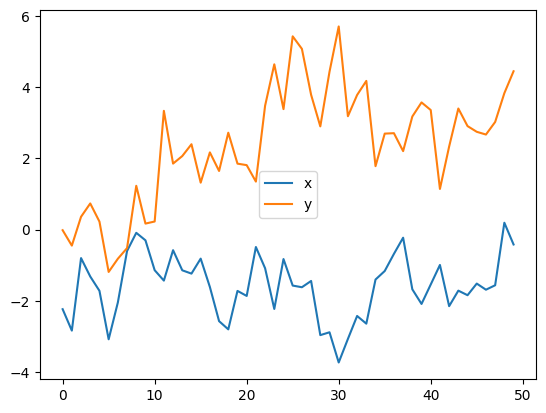

In [60]:
# 범례 legend
plt.plot(np.random.randn(50).cumsum(), label='x')
plt.plot(np.random.randn(50).cumsum(), label='y')
plt.legend(loc='center') # 범례위치 best, upper left, upper right, lower left, lower right, right, center
plt.show()

##### Pandas 데이터 프레임, 시리즈

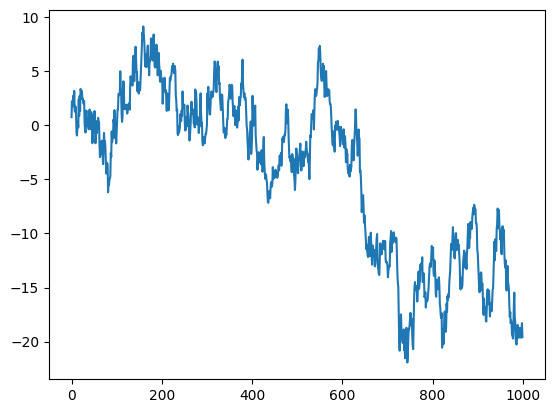

In [63]:
# 판다스 시리즈
pd.Series(np.random.randn(1000).cumsum()).plot()
plt.show()

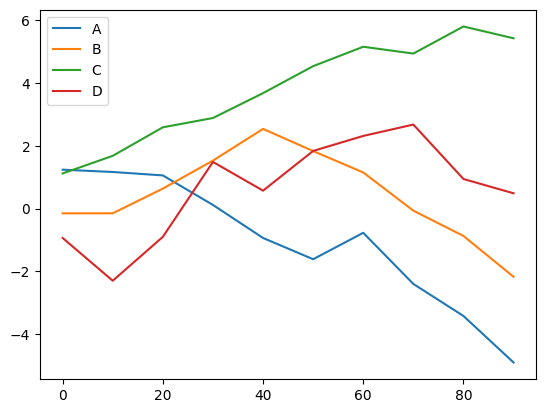

In [69]:
# 데이터 프레임
pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10)).plot()
plt.show()

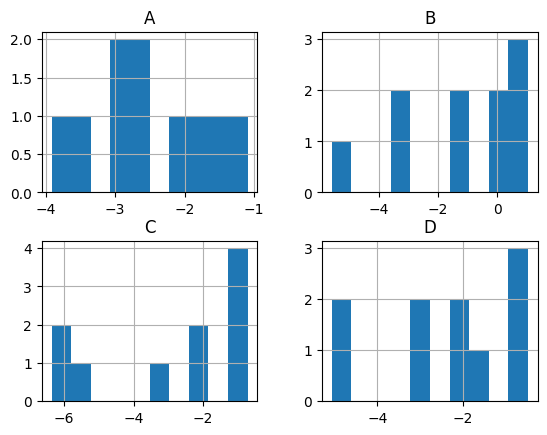

In [70]:
pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10)).hist()
plt.show()

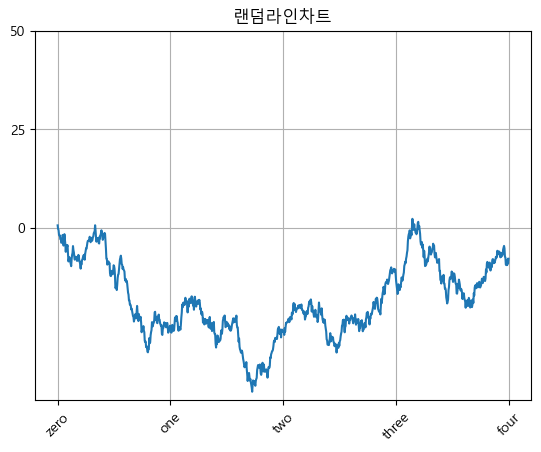

In [85]:
# 한글깨짐현상
import matplotlib
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 한글 깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스(-) 깨짐현상 해결

# x, y 축 설정
chart = pd.Series(np.random.randn(1000).cumsum()).plot()
chart.set_xticks([0, 250, 500, 750, 1000]) # x축 간격 조정
chart.set_yticks([0, 25, 50]) # y축 간격 조정
chart.set_title('랜덤라인차트')
chart.set_xticklabels(['zero', 'one', 'two', 'three', 'four'], rotation=45) # x축을 라벨로 표시
chart.grid(True) # 그리드선 표시

plt.show()

#### 예제연습

- 캐글 타이타닉 연습문제 CSV
    - https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv

In [86]:
train = pd.read_csv('https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv')
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [88]:
# 성별 생존률 교차도표 생성
gender_servived = pd.crosstab(train['Sex'], train['Survived'])
gender_servived.columns = gender_servived.columns.map({0:'Dead', 1:'Alive'})

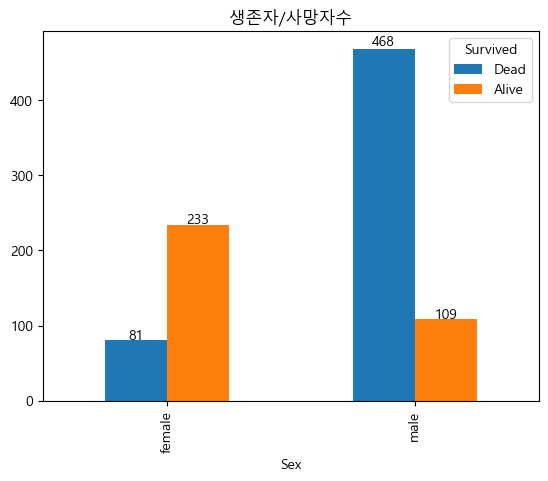

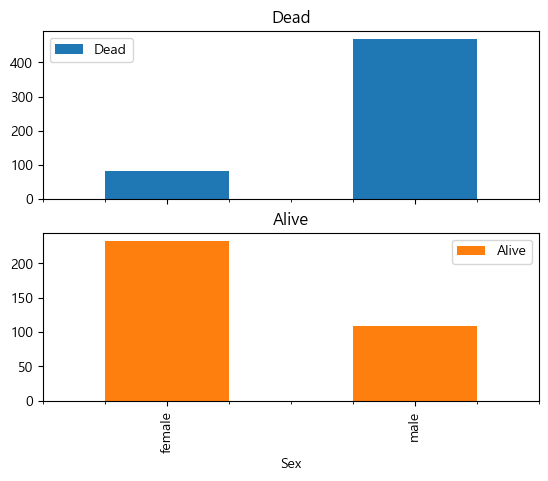

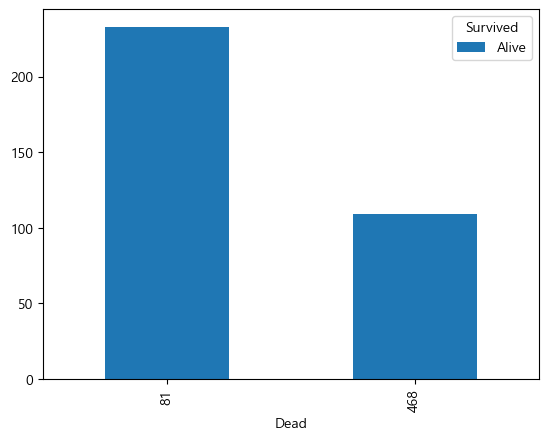

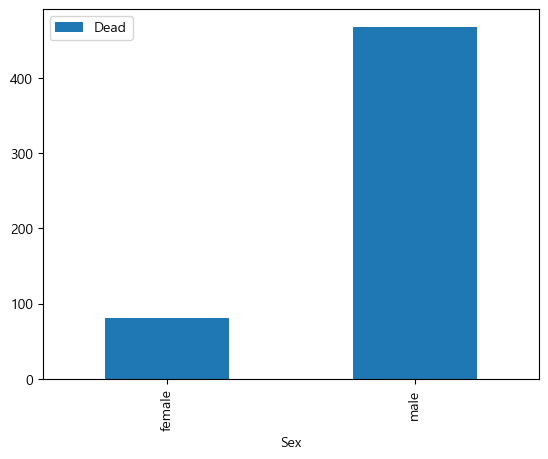

In [110]:
# bar = gender_servived.plot.bar() # 바차트
bar = gender_servived.plot(kind='bar', title='생존자/사망자수')

# 각 차트의 수치 표시
for p in bar.patches:
    left, bottom, width, height = p.get_bbox().bounds
    bar.annotate(f'{height:n}', (left + width / 2, height * 1.01), ha = 'center')

gender_servived.plot.bar(subplots=True) # 성별로 따로 바차트를 추가 생성
# bar.set_title('생존자/사망자수')
# gender_servived.plot.bar(x='Alive') # 차트는 사망자, x축에는 생존자 수치 표시
# gender_servived.plot.bar(x='Dead')
gender_servived.plot.bar(y='Dead')
plt.show()

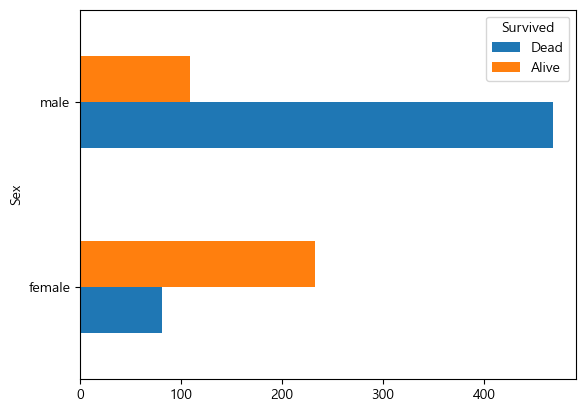

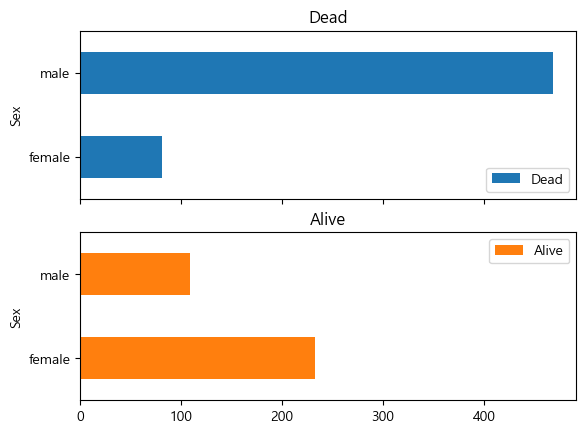

In [123]:
# 가로 바 차트
gender_servived.plot(kind='barh')
gender_servived.plot.barh(subplots=True)
plt.show()

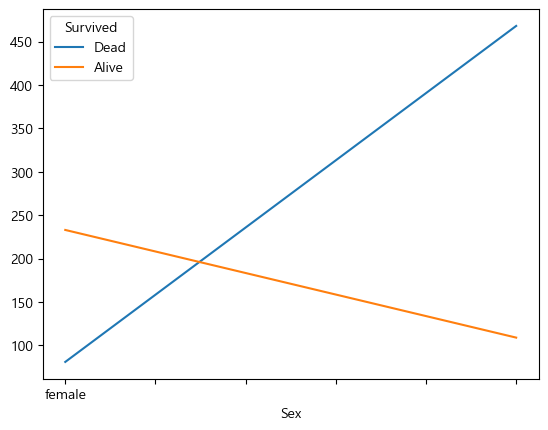

In [115]:
# 라인차트
gender_servived.plot(kind='line')
plt.show()

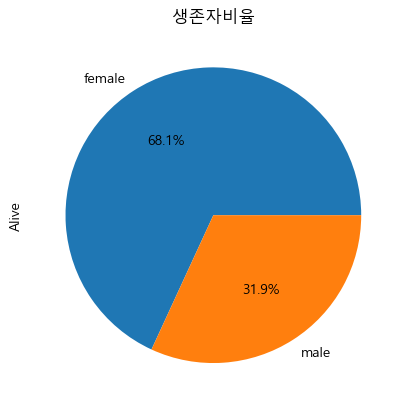

In [121]:
# 파이차트
gender_servived['Alive'].plot(kind='pie', title='생존자비율', autopct='%1.1f%%')
plt.show()

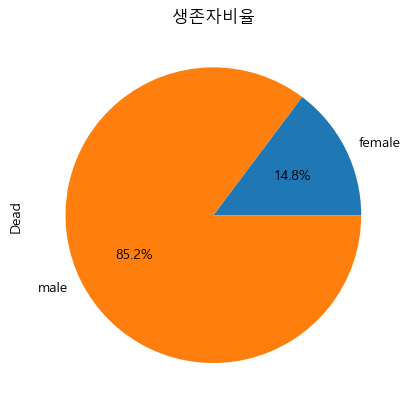

In [122]:
# 파이차트
gender_servived['Dead'].plot(kind='pie', title='사망자비율', autopct='%1.1f%%')
plt.show()